Library Import

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
%matplotlib inline

Dataset Import

In [4]:
red_wine_dataset = pd.read_csv("winequality-red.csv", sep = ';')
red_wine_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
white_wine_dataset = pd.read_csv("winequality-white.csv", sep = ';')
white_wine_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Define All Fields

In [6]:
fixed_acidity_field = "fixed acidity"
volatile_acidity_field = "volatile acidity"
citric_acid_field = "citric acid"
residual_sugar_field = "residual sugar"
chlorides_field = "chlorides"
free_sulfur_dioxide_field = "free sulfur dioxide"
total_sulfur_dioxide_field = "total sulfur dioxide"
density_field = "density"
ph_field = "pH"
sulphates_field = "sulphates"
alcohol_field = "alcohol"
quality_field = "quality"

Define Categorical and Numerical Features

In [7]:
numerical_features = [fixed_acidity_field, volatile_acidity_field, citric_acid_field,
                      residual_sugar_field, chlorides_field, free_sulfur_dioxide_field,
                      total_sulfur_dioxide_field, density_field, ph_field, sulphates_field]
categorical_features = [quality_field]

In [8]:
labels = numerical_features.copy()
target = categorical_features.copy()

In [9]:
x_white = white_wine_dataset[labels]
x_red = red_wine_dataset[labels]

y_white = white_wine_dataset[target]
y_red = red_wine_dataset[target]

# Pre Data Visualization

Pairplot - Distribution & Comparison & Correlation

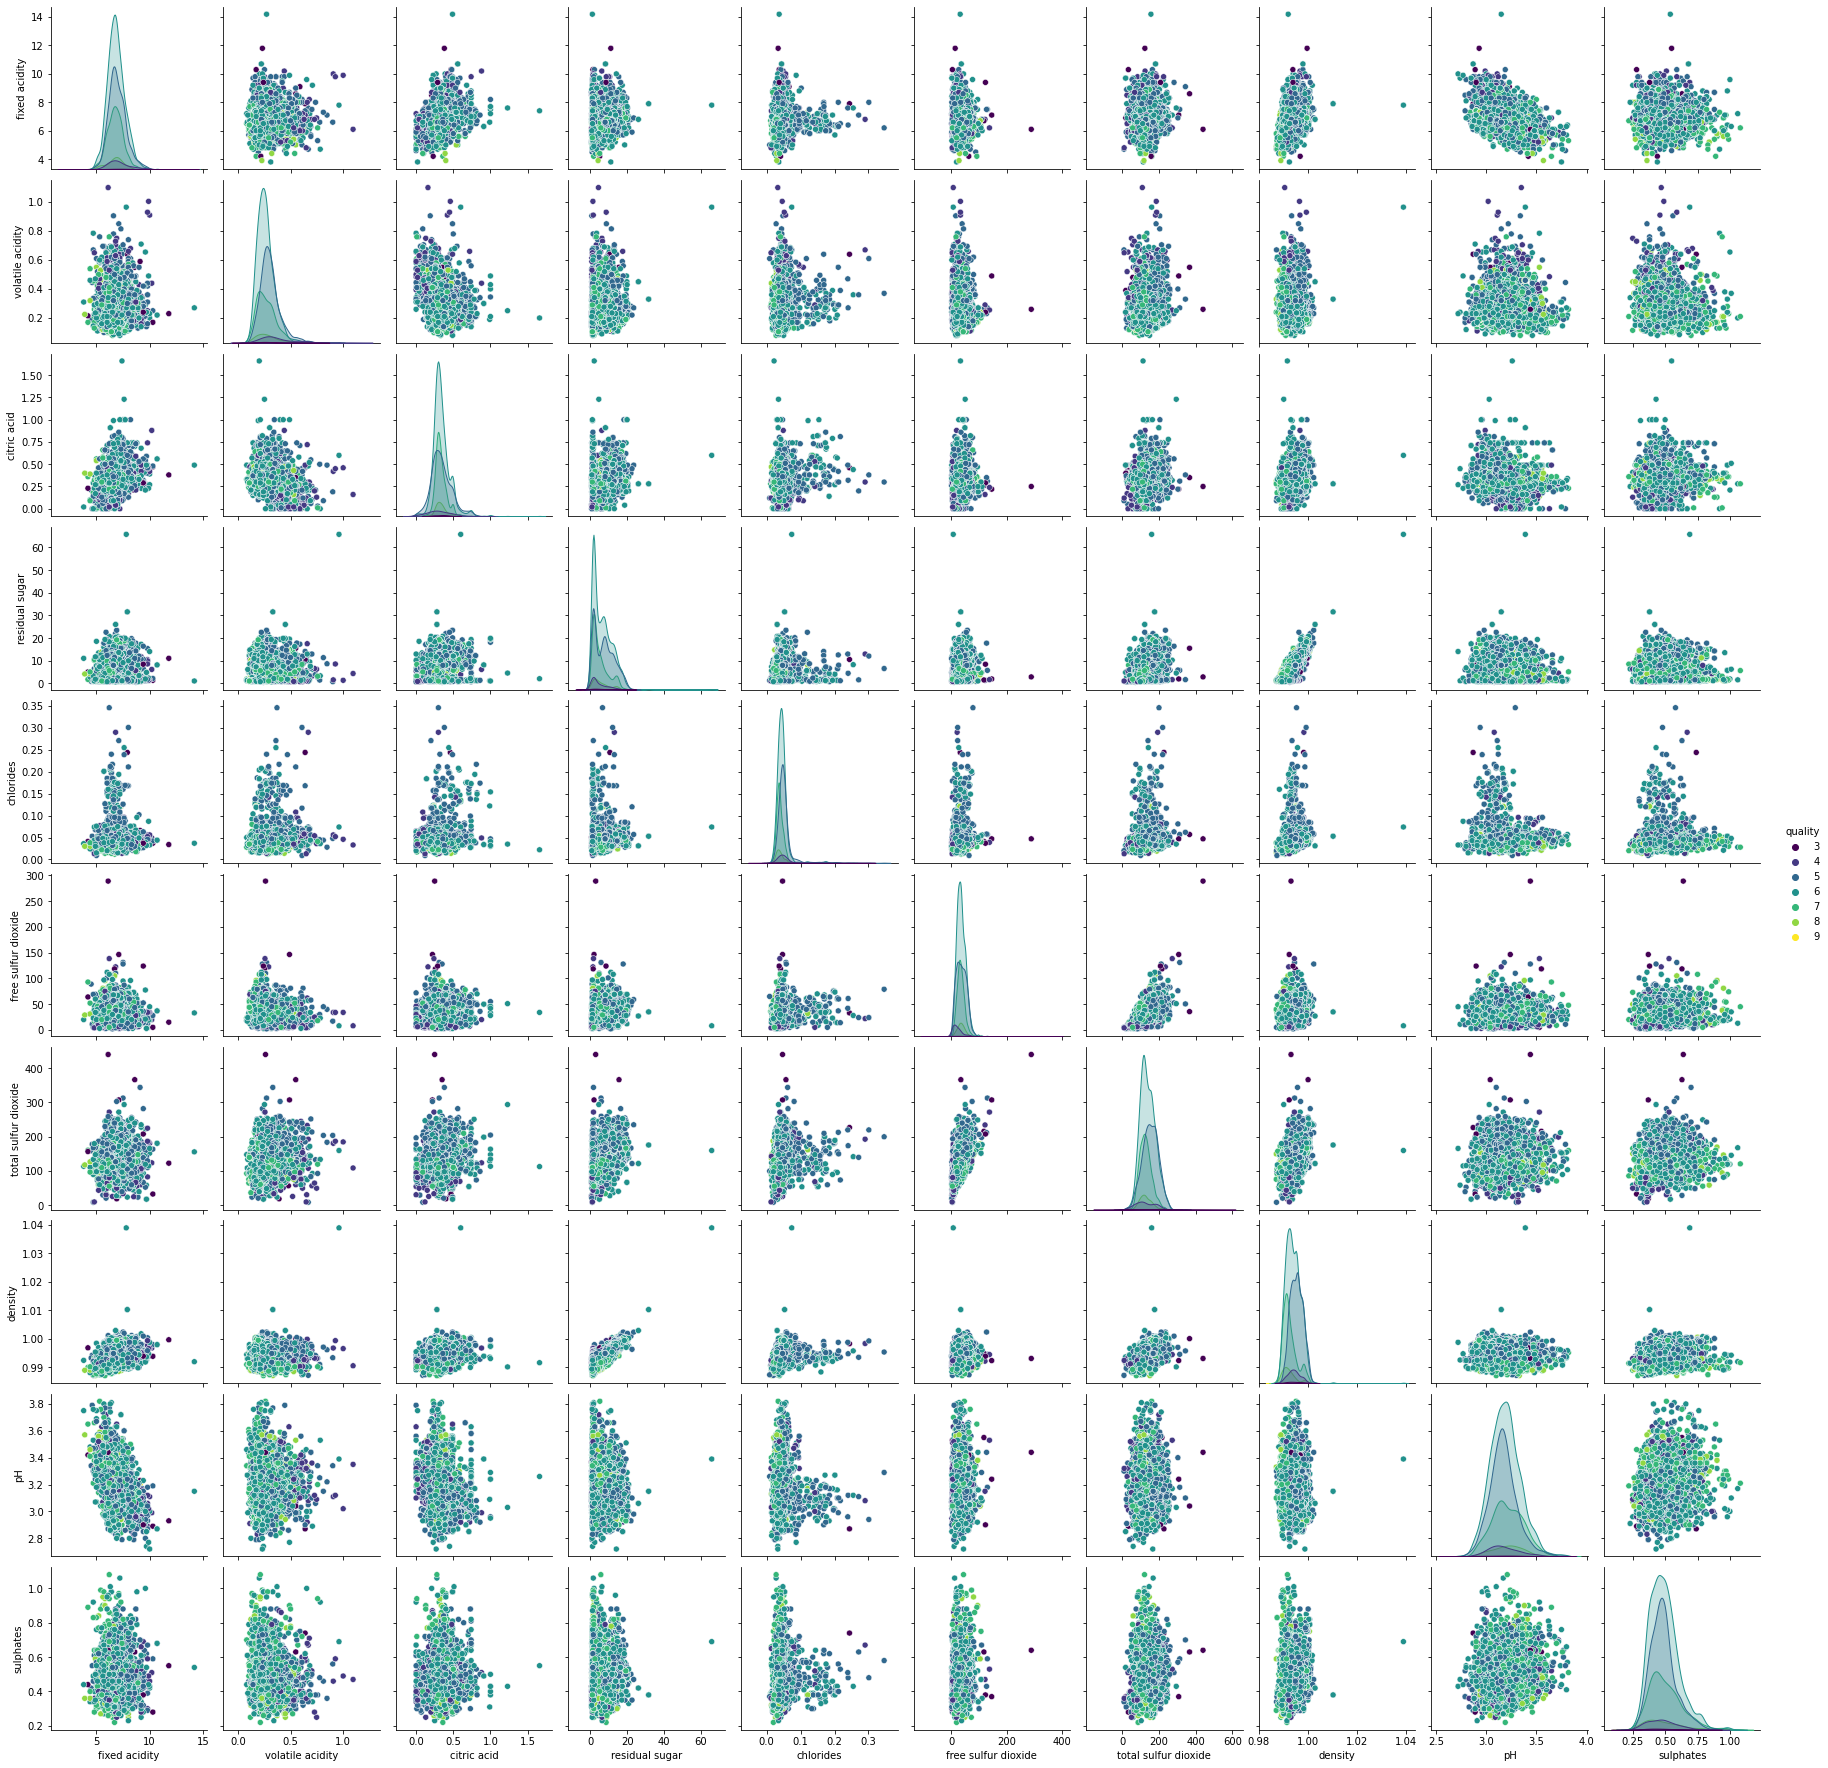

In [7]:
pairplot_fields = numerical_features.copy()
pairplot_fields.append(quality_field)

sns.pairplot(
    data = white_wine_dataset[pairplot_fields], 
    hue = quality_field,
    palette = 'viridis',
)
plt.show()

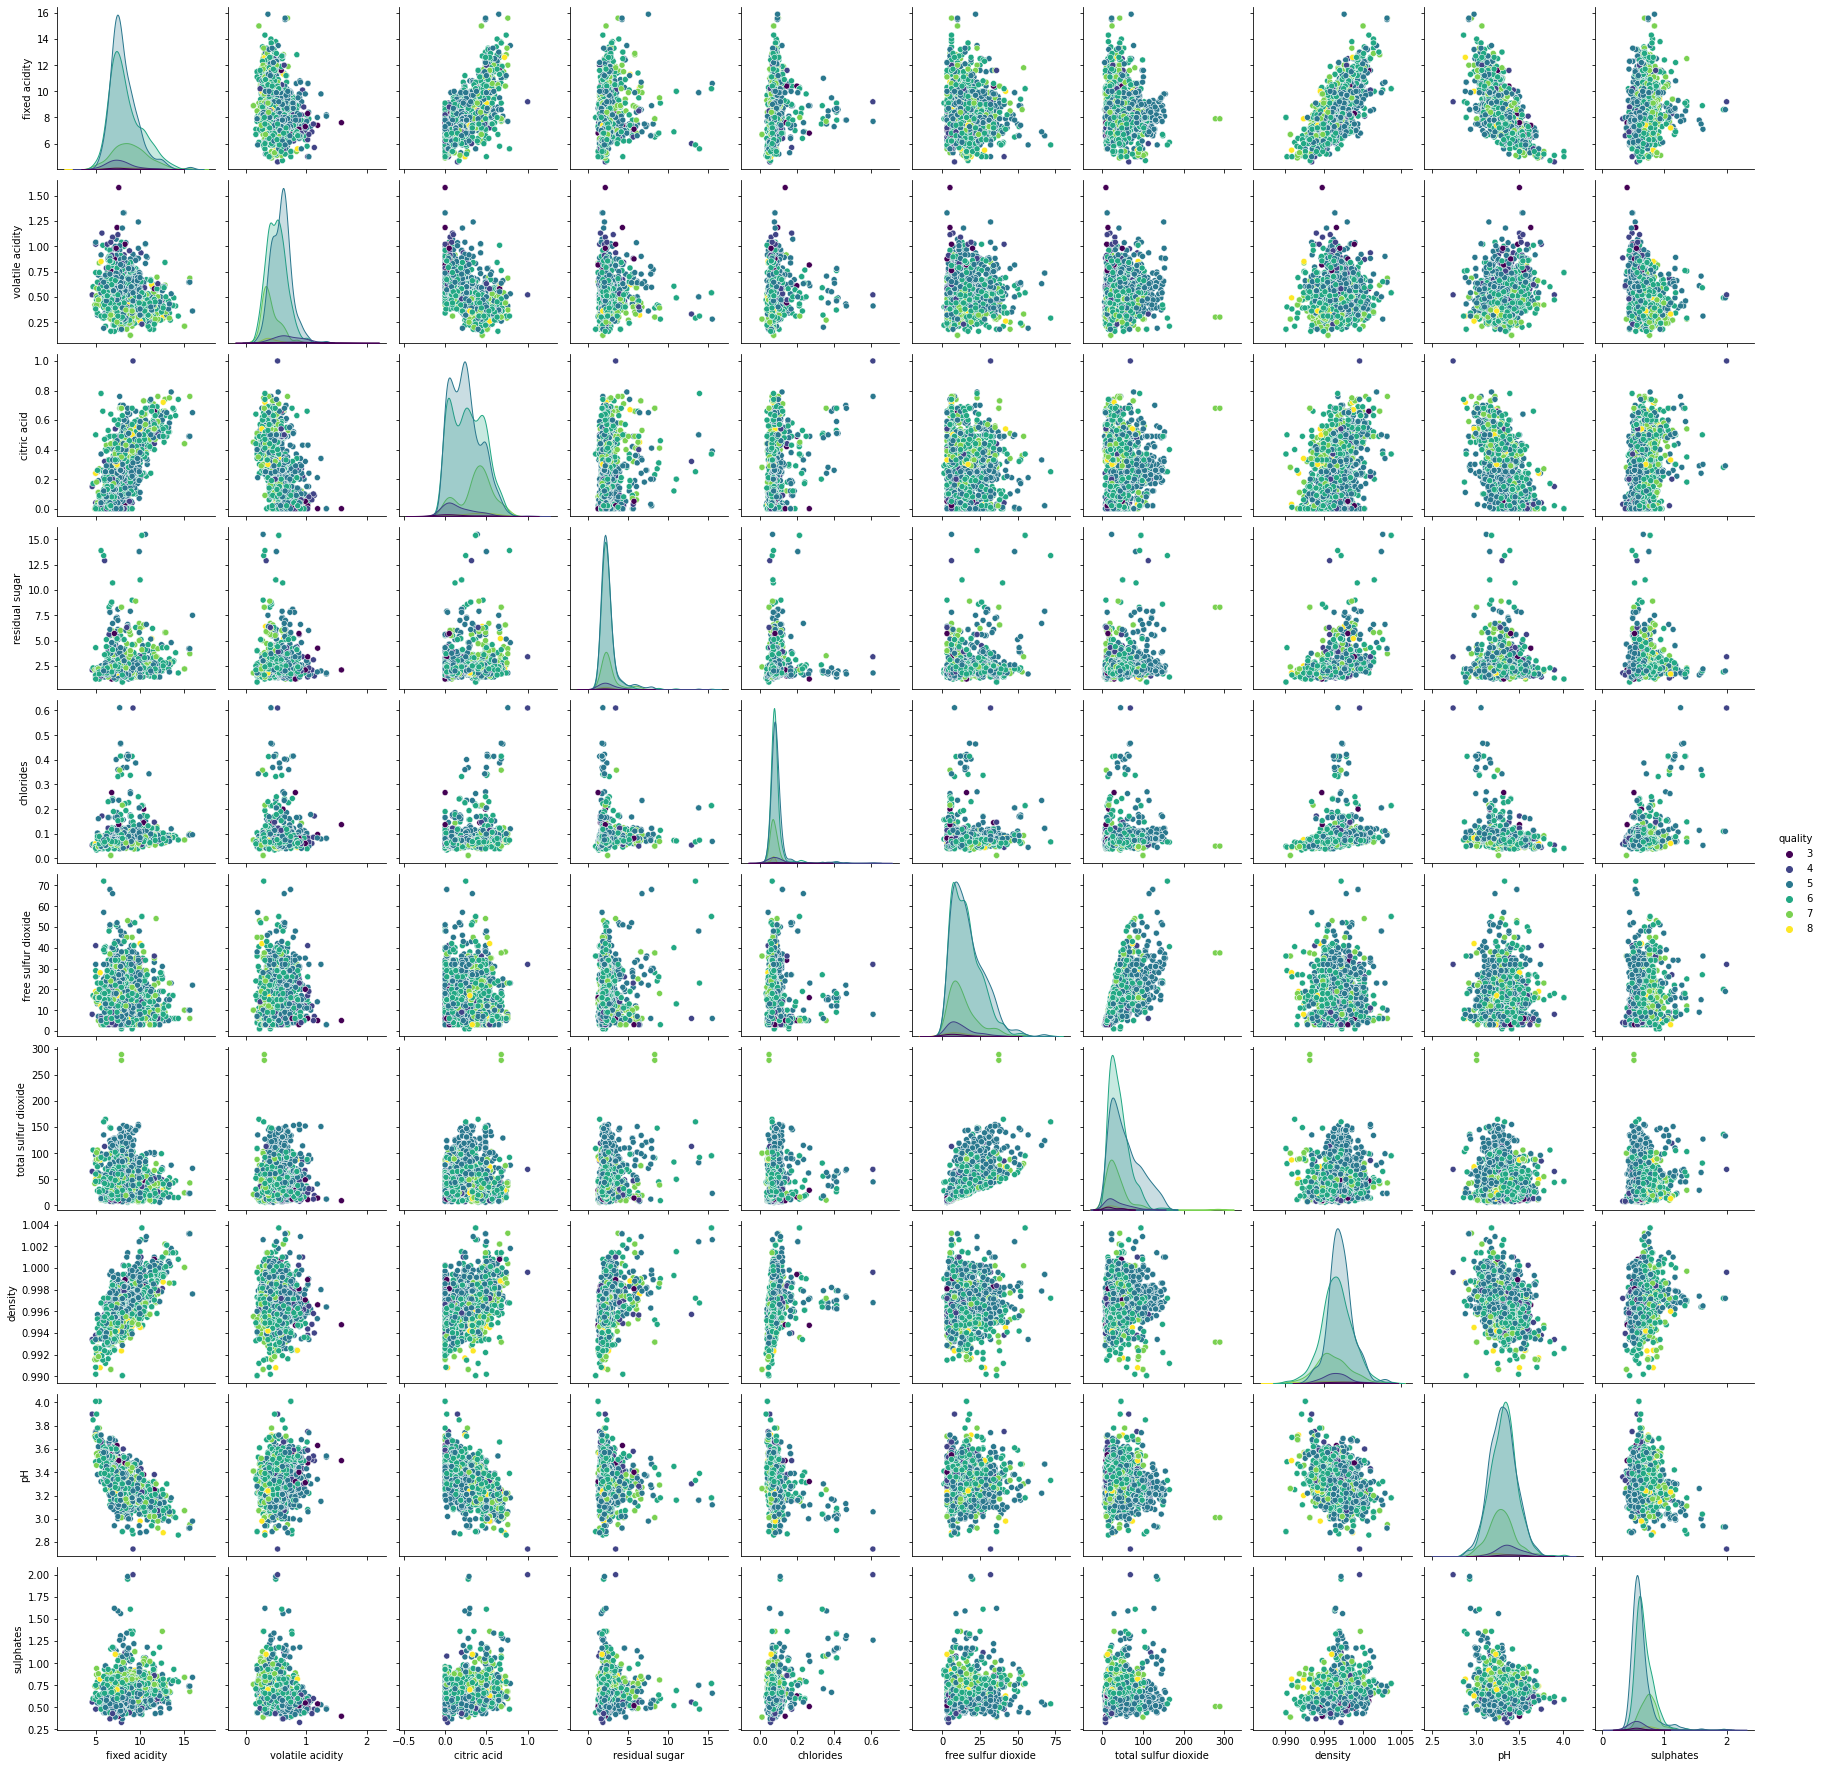

In [9]:
sns.pairplot(
    data = red_wine_dataset[pairplot_fields], 
    hue = quality_field,
    palette = 'viridis',
)
plt.show()

Correlation Plot - Correlation

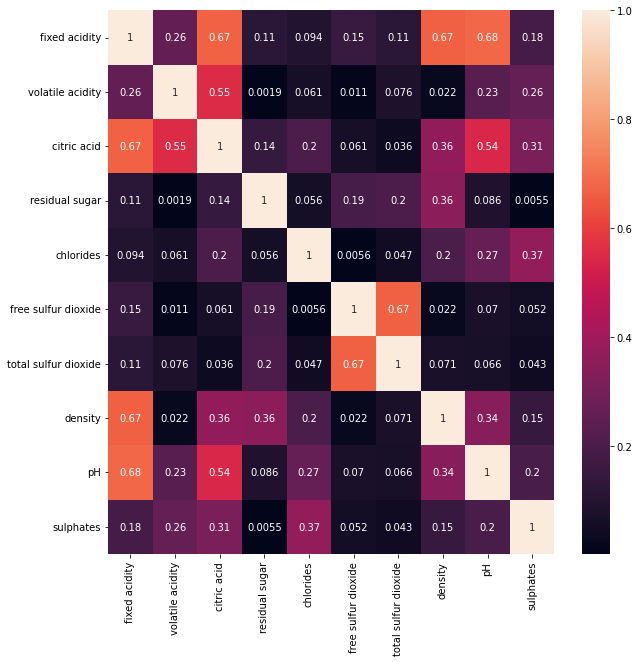

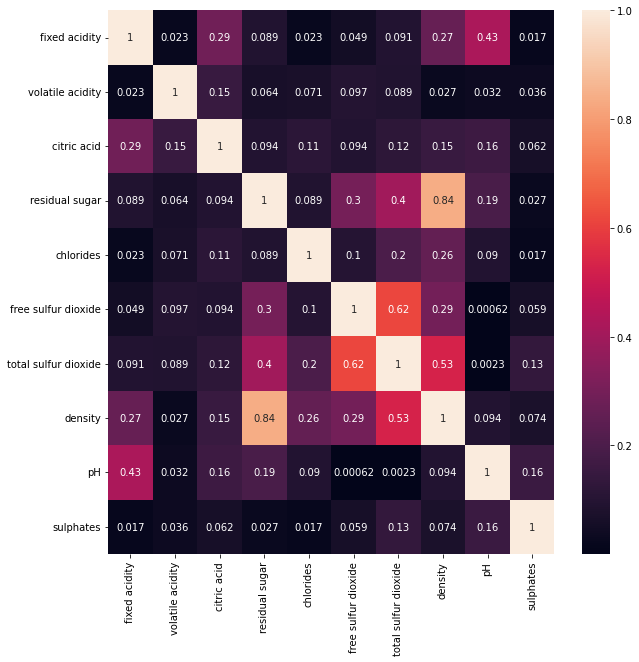

In [7]:
corr_plot_fields = numerical_features.copy()

plt.figure(figsize = (10, 10))
sns.heatmap(np.abs(red_wine_dataset[corr_plot_fields].corr()), annot = True)
plt.show()

plt.figure(figsize = (10, 10))
sns.heatmap(np.abs(white_wine_dataset[corr_plot_fields].corr()), annot = True)
plt.show()

# Feature Extraction

Define Helper Function

In [17]:
def get_feature_extraction_df(feature_extraction_model, x, y, column_names):
    x_pca_data = feature_extraction_model.fit_transform(x)

    x_pca_data_df = pd.DataFrame(x_pca_data, columns = column_names)
    pca_data_df =  pd.concat([x_pca_data_df, y], axis = 1)

    return pca_data_df

PCA

In [18]:
pca_column_names = ["PC1", "PC2"]
pca_white_model = PCA(n_components = 2, random_state = 100)
pca_red_model = PCA(n_components = 2, random_state = 100)

white_pca_df = get_feature_extraction_df(pca_white_model, x_white, y_white, pca_column_names)
red_pca_df = get_feature_extraction_df(pca_red_model, x_red, y_red, pca_column_names)

print(pca_white_model.explained_variance_ratio_)
print(pca_red_model.explained_variance_ratio_)
print(white_pca_df)
print(red_pca_df)

[0.91016437 0.0793872 ]
[0.94743702 0.04840413]
            PC1        PC2  quality
0     33.713824   1.247340        6
1    -11.939516 -18.950606        6
2    -41.233058   5.746492        6
3     49.083503  -1.213519        6
4     49.083503  -1.213519        6
...         ...        ...      ...
4893 -47.877907   1.210469        6
4894  34.327250  13.162073        5
4895 -28.010287   1.995981        6
4896 -31.599528  -7.380379        7
4897 -42.656326  -2.305974        6

[4898 rows x 3 columns]
            PC1        PC2  quality
0    -13.231686  -2.007945        5
1     22.034229   4.415716        5
2      7.158845  -2.493358        5
3     13.426361  -1.943438        6
4    -13.231686  -2.007945        5
...         ...        ...      ...
1594   1.129704  16.313561        5
1595   9.495223  21.617527        6
1596  -3.427683  14.264636        6
1597   1.131564  16.320984        5
1598  -3.870768   3.118533        6

[1599 rows x 3 columns]


ICA

In [19]:
fast_ica_column_names = ["ICA 1", "ICA 2"]

red_fast_ica = FastICA(n_components = 2, random_state = 100)
white_fast_ica = FastICA(n_components = 2, random_state = 100)

red_fast_ica_df = get_feature_extraction_df(red_fast_ica, x_red, y_red, fast_ica_column_names)
white_fast_ica_df = get_feature_extraction_df(white_fast_ica, x_white, y_white, fast_ica_column_names)

print(red_fast_ica_df)
print(white_fast_ica_df)

         ICA 1     ICA 2  quality
0     0.005846 -0.010296        5
1    -0.008161  0.020299        5
2    -0.008420 -0.004956        5
3    -0.011778 -0.001258        6
4     0.005846 -0.010296        5
...        ...       ...      ...
1594  0.023206  0.048347        5
1595  0.025434  0.066720        6
1596  0.023226  0.040809        6
1597  0.023215  0.048369        5
1598  0.007152  0.007886        6

[1599 rows x 3 columns]
         ICA 1     ICA 2  quality
0     0.010601  0.003112        6
1    -0.000489 -0.021218        6
2    -0.014249  0.004097        6
3     0.015969  0.001239        6
4     0.015969  0.001239        6
...        ...       ...      ...
4893 -0.015581 -0.001179        6
4894  0.008696  0.016093        5
4895 -0.009343  0.000710        6
4896 -0.008841 -0.009668        7
4897 -0.013285 -0.004729        6

[4898 rows x 3 columns]


t-SNE

In [20]:
tsne_column_names = ["T-SNE 1", "T-SNE 2"]

red_tsne = TSNE(n_components = 2, random_state = 100)
white_tsne = TSNE(n_components = 2, random_state = 100)

red_tsne_df = get_feature_extraction_df(red_tsne, x_red, y_red, tsne_column_names)
white_tsne_df = get_feature_extraction_df(white_tsne, x_white, y_white, tsne_column_names)

print(red_tsne_df)
print(white_tsne_df)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


        T-SNE 1    T-SNE 2  quality
0    -24.925138  13.163420        5
1     23.797312  22.163006        5
2      6.084360  20.891867        5
3     12.306050  22.540312        6
4    -24.925129  13.163288        5
...         ...        ...      ...
1594   5.887661  45.082874        5
1595  13.614357  44.327274        6
1596   1.811779  46.206989        6
1597   5.885110  45.399628        5
1598 -14.687200  29.520348        6

[1599 rows x 3 columns]
        T-SNE 1    T-SNE 2  quality
0     30.456060  32.063740        6
1    -39.801407  20.728441        6
2    -23.807232 -54.225754        6
3     32.254646  53.503700        6
4     32.254612  53.503593        6
...         ...        ...      ...
4893 -33.524021 -67.376144        6
4894  45.659958  27.502813        5
4895 -20.171530 -29.173573        6
4896 -57.774605 -13.711439        7
4897 -38.272297 -54.270119        6

[4898 rows x 3 columns]


Save All Results in Dictionary

In [21]:
feature_extraction_data = {
    "PCA": [red_pca_df, white_pca_df],
    "ICA": [red_fast_ica_df, white_fast_ica_df],
    "t-SNE": [red_tsne_df, white_tsne_df],
}

# Post Data Visualization

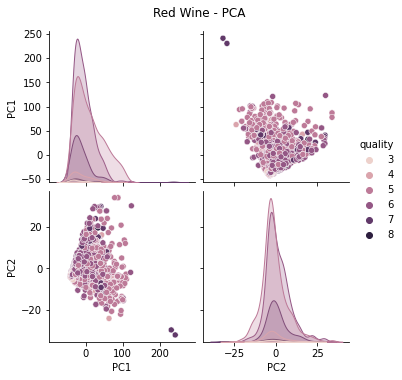

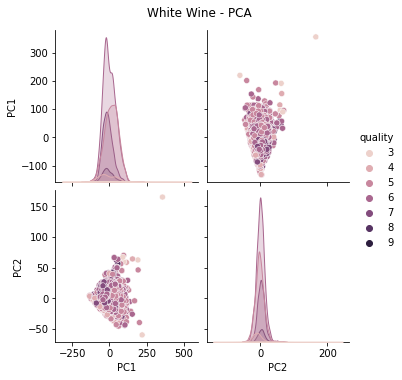

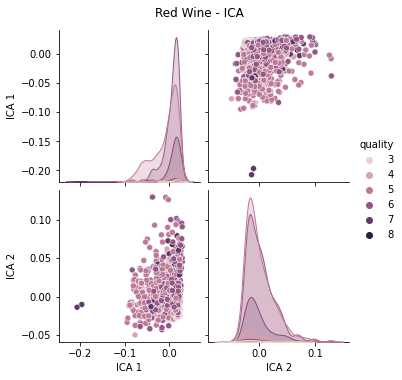

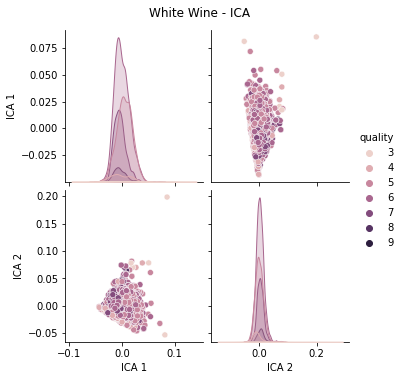

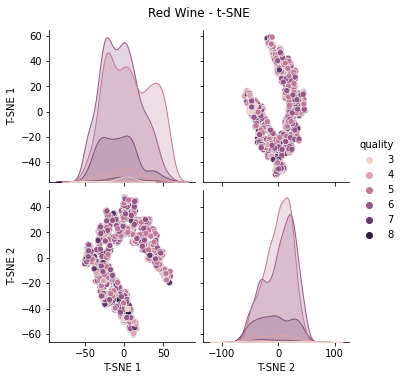

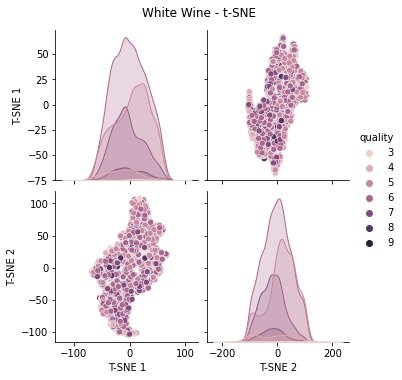

In [39]:
for index, feature_extraction_name in enumerate(feature_extraction_data):
    red_feature_extraction_df = feature_extraction_data[feature_extraction_name][0]
    white_feature_extraction_df = feature_extraction_data[feature_extraction_name][1]
    
    red_pairplot = sns.pairplot(red_feature_extraction_df, hue = quality_field)
    red_pairplot.fig.suptitle(f"Red Wine - {feature_extraction_name}", y = 1.04)

    white_pairplot = sns.pairplot(white_feature_extraction_df, hue = quality_field)
    white_pairplot.fig.suptitle(f"White Wine - {feature_extraction_name}", y = 1.04)